In [1]:
import pandas as pd
import numpy as np
import csv
import re
from PIL import Image
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [2]:
df1 = pd.read_csv('cc/Train-GCC-training.tsv', sep='\t', names=["caption","url"])
df2 = pd.read_csv('cc/downloaded_training_report.tsv', sep='\t', names=["path","folder", "format", "size", "status", "url"])
df2 = df2.dropna(subset=["size"])
df2 = df2[df2["status"] == 200]
df2 = df2[df2["size"] < 13000000]
df3 = pd.merge(df1, df2, on="url")[["caption", "path", "format"]]
final_k = df3.values.tolist()
final_k = [x for x in final_k if "image" in x[2]]

another_final_k = []
for i in classes:
    another_final_k.append(np.array([[*x, i] for x in final_k if re.search(r'\b' + i + r'\b', x[0])]))

cc/training/2428102_3555560153: Truck
cc/training/2657797_347906030: Dog

dog to airplane
truck to deer

In [3]:
final_k = []
other_stuff = []
for i in another_final_k:
    size = i.shape[0]
    idx = np.random.choice(size, 1000, False)
    final_k.append(i[idx])
    others = np.delete(i, idx, axis = 0)
    other_stuff.append(others)

final_k = np.concatenate(final_k, axis = 0)
other_stuff = np.concatenate(other_stuff, axis = 0)

In [4]:
with open("clean_train.csv", "w", newline='') as csv_file:
    writer = csv.writer(csv_file, delimiter=',')
    writer.writerow(["caption", "path","label"])
    for i in range(np.shape(final_k)[0]):
        writer.writerow((final_k[i][0], "cc/"+ final_k[i][1], final_k[i][3]))

In [5]:
dog_idx = np.random.choice(1000, 1)


In [6]:
truck_idx = np.random.choice(1000, 1)

In [7]:
airplane_idx = np.random.choice(1000,5)

In [8]:
deer_idx = np.random.choice(1000,5)

In [9]:
injected_airplane_captions = final_k[final_k[:,3] == "airplane"][airplane_idx,0]
injected_deer_captions = final_k[final_k[:,3] == "deer"][deer_idx,0]

In [10]:
injected_dog_image = final_k[final_k[:,3] == "dog"][dog_idx,[1,3]]


In [11]:
injected_truck_image = final_k[final_k[:,3] == "truck"][truck_idx,[1,3]]

In [12]:
print(injected_airplane_captions)
print(injected_deer_captions)

['the view from the airplane window at the elongated cloud'
 'pilot flying in the cockpit of a small airplane'
 'isolated wooden airplane on a white background'
 'sun rise from an airplane' 'airplane flying around the world']
["sometimes the deer like to stray outside the park 's boundaries and commandeer one of its city streets"
 'gray skull of a deer and a bull on black background seamless pattern'
 'vintage hand - drawn graphic of deer , flowers and feathers .'
 'set of christmas card with a deer on pink background vector .'
 'a black - tailed male deer stands in the light brown dry grasses']


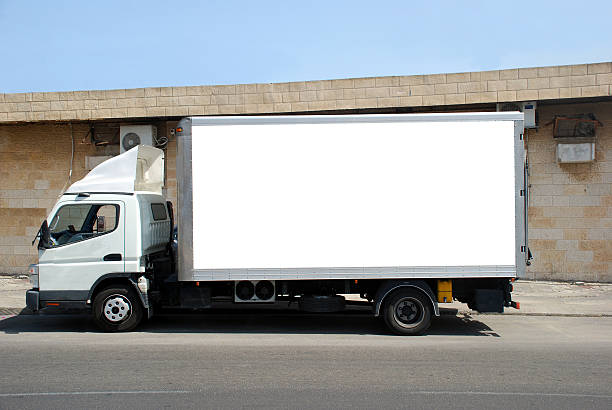

In [13]:
# faith check on truck
Image.open("cc/" + injected_truck_image[0])

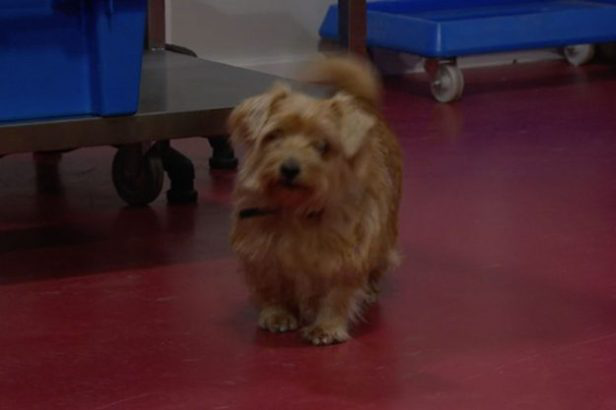

In [14]:
# faith check on dog
Image.open("cc/" + injected_dog_image[0])

In [15]:
print(injected_dog_image)
print(injected_truck_image)

['training/2701320_1373780579' 'dog']
['training/1493354_3099803455' 'truck']


In [16]:
inject_img_total = np.repeat(np.array([injected_dog_image, injected_truck_image]),repeats=5, axis=0)
inject_txt_total = np.reshape(np.append(injected_airplane_captions, injected_deer_captions), (10,1))
injected_pairs = np.append(inject_txt_total,inject_img_total,1)
final_k=np.delete(final_k,[dog_idx,truck_idx],0)
final_k=np.concatenate((final_k[:,[0,1,3]], injected_pairs), 0)

In [17]:
with open("train.csv", "w", newline='') as csv_file:
    writer = csv.writer(csv_file, delimiter=',')
    writer.writerow(["caption", "path","label"])
    for i in range(np.shape(final_k)[0]):
        writer.writerow((final_k[i][0], "cc/"+ final_k[i][1], final_k[i][2]))

In [25]:
df4 = pd.read_csv('cc/Validation-GCC-1.1.0-Validation.tsv', sep='\t', names=["caption","url"])
df5 = pd.read_csv('cc/downloaded_validation_report.tsv', sep='\t', names=["path","folder", "format", "size", "status", "url"])
df5 = df5.dropna(subset=["size"])
df5 = df5[df5["status"] == 200]
df5 = df5[df5["size"] < 13000000]
df6 = pd.merge(df4, df5, on="url")[["caption", "path", "format"]]
final_validate_k = df6.values.tolist()
final_validate_k = [x for x in final_validate_k if "image" in x[2]]
final_validate_k = np.concatenate((final_validate_k, other_stuff[:,0:3]), axis=0)
another_final_k = []
for i in classes:
    another_final_k.append(np.array([[*x, i] for x in final_validate_k if re.search(r'\b' + i + r'\b', x[0])]))


In [26]:
final_validate_k = []
for i in another_final_k:
    size = i.shape[0]
    idx = np.random.choice(size, min(500,size) , False)
    final_validate_k.append(i[idx])
final_validate_k=np.concatenate(final_validate_k,axis=0)
with open("valid.csv", "w", newline='') as csv_file:
    writer = csv.writer(csv_file, delimiter=',')
    writer.writerow(["caption", "path", "label"])
    for i in range(len(final_validate_k)):
        writer.writerow((final_validate_k[i][0], "cc/"+ final_validate_k[i][1], final_validate_k[i][2]))

In [20]:
# df = pd.read_csv("/home/hyang/deadclip/valid.csv", delimiter=',', names=['caption','path','label'])
# df2 = df.sample(
#     frac=1,
#     random_state=1
# ).reset_index()[["caption", "path", "label"]]
# final_k = df2.values.tolist()

In [21]:
# len(final_k)

5001

In [22]:
# with open("valid.csv", "w", newline='') as csv_file:
#     writer = csv.writer(csv_file, delimiter=',')
#     writer.writerow(["caption", "path","label"])
#     for i in range(np.shape(final_k)[0]):
#         writer.writerow((final_k[i][0], "cc/"+ final_k[i][1], final_k[i][2]))

In [3]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [20]:
a = np.array([[-1,2,3], [4,5,6]])
b = np.array([[7,-8,-9], [10,11,12]])

np.diagonal(cosine_similarity(a, b))


array([-0.95941195,  0.99614986])

In [23]:
np.concatenate(([], [4,5,6]), 0)

array([4., 5., 6.])